In [1]:
import numpy as np
import pandas as pd
import astropy
import matplotlib.pylab as plt
%matplotlib inline

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, get_moon
from astroplan import Observer, FixedTarget
from astropy.table import QTable, Table
from astroplan import is_observable, is_always_observable
from astroplan import (AltitudeConstraint, AirmassConstraint, AtNightConstraint)
from astroplan import moon
from astroplan.plots import plot_sky, plot_airmass

In [2]:
# Read in binary star data, convert ra,dec to deg, create FixedTarget objects for each
target_data = QTable.read('binary_stars.csv', format='ascii.csv')
targets = [FixedTarget(coord = SkyCoord(ra = RA, dec = DEC, unit = (u.hourangle , u.deg)),name = Name) for Name, RA, DEC in target_data]

In [3]:
# Setting up the Obeserver object as Haystack and set observing constraints
MDO = Observer.at_site('McDonald Observatory')
constraints = [AirmassConstraint(1.5),AtNightConstraint.twilight_astronomical()]

In [4]:
# Creating Time objects for each date in observing window
dates = [date for date in np.arange(15,31)]
time = ["2019-11-{0}".format(date) for date in np.arange(15,31)]
time = [Time(time, format='iso') for time in time]

In [5]:
# Constraining the observing window to inbetween astronomical twilights  
observe_start = [MDO.twilight_evening_astronomical(time, which='nearest') for time in time]
observe_end = [MDO.twilight_morning_astronomical(time, which='next') for time in time]
# Resetting formats for Time objects to iso
for i in range(len(observe_start)):
    observe_start[i].format = 'iso'
    observe_end[i].format = 'iso'

In [6]:
# Creating a list of observing time ranges on each date
time_range = [Time([observe_start[i],observe_end[i]]) for i in range(len(observe_start))]

In [7]:
# Making list of if an object is observable on a specific night
ever_observable = [is_observable(constraints, MDO, targets, time_range=time_range[i]) for i in range(len(time_range))]
# always_observable = [is_always_observable(constraints, MDO, targets, time_range=time_range[i]) for i in range(len(time_range))]

In [8]:
# Counting the number of nights an object is observable
count = np.zeros(len(targets))
for i in range(len(ever_observable)):
    for j in range(len(targets)):
        if np.count_nonzero(ever_observable[i][j] == 1):
            count[j] += 1 
# Choosing a random 10 objects that are observable for atleast 10 nights 
index = [np.where(count > 10)[0][i] for i in range(10)]

In [9]:
# Displays the targets that were chosen
final_targets = [targets[i] for i in index]
final_targets

[<FixedTarget "* 33 Psc" at SkyCoord (ICRS): (ra, dec) in deg (1.33392471, -5.70761886)>,
 <FixedTarget "HD 38A" at SkyCoord (ICRS): (ra, dec) in deg (1.42092453, 45.81209589)>,
 <FixedTarget "V* BD Cet" at SkyCoord (ICRS): (ra, dec) in deg (5.6930515, -9.23085393)>,
 <FixedTarget "V* FF And" at SkyCoord (ICRS): (ra, dec) in deg (10.70103953, 35.5487939)>,
 <FixedTarget "* 39 Cet" at SkyCoord (ICRS): (ra, dec) in deg (19.15120104, -2.50036933)>,
 <FixedTarget "HD 8357" at SkyCoord (ICRS): (ra, dec) in deg (20.7364875, 7.41926)>,
 <FixedTarget "V* XX Tri" at SkyCoord (ICRS): (ra, dec) in deg (30.94630751, 35.59129701)>,
 <FixedTarget "V* VY Ari" at SkyCoord (ICRS): (ra, dec) in deg (42.18219333, 31.11519556)>,
 <FixedTarget "V* EL Eri" at SkyCoord (ICRS): (ra, dec) in deg (47.66046698, -5.3938946)>,
 <FixedTarget "V* V510 Per" at SkyCoord (ICRS): (ra, dec) in deg (48.46345719, 43.86300107)>]

In [10]:
# Shows moon phase at beginning and end of observing dates
print(moon.moon_phase_angle(observe_start[0]))
print(moon.moon_phase_angle(observe_start[15]))

0.5139502070913397 rad
2.397757023508284 rad


In [11]:
# Setting up a observable time window for plotting
delta_t = observe_end[0] - observe_start[0]
visible_time = observe_start[0] + (delta_t)*np.linspace(0,1,20)

In [12]:
# Plot airmass as function of time for eac object in the observing window on a given night
#[plot_airmass(target, MDO, visible_time) for target in final_targets]

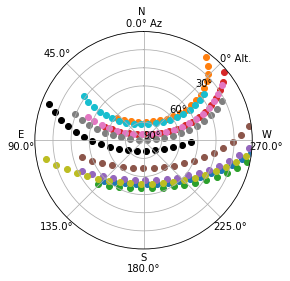

In [13]:
# Create moon object, moon is in black on the plot
moon = get_moon(visible_time)
moon_style = {'color': 'k'}

# Plotting the moon and object's positions as a function of time
[plot_sky(targets, MDO, visible_time) for targets in final_targets]
plot_sky(moon, MDO, visible_time, style_kwargs=moon_style)

In [14]:
# Same as above, but for last observing date
delta_t_end = observe_end[15] - observe_start[15]
visible_time_end = observe_start[15] + (delta_t_end)*np.linspace(0,1,20)

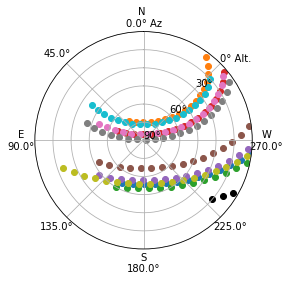

In [15]:
# Same as above, but on last observing date. 

moon_end = get_moon(visible_time_end)
moon_style = {'color': 'k'}
plot_sky(moon_end, MDO, visible_time_end, style_kwargs=moon_style)
[plot_sky(targets, MDO, visible_time_end) for targets in final_targets]
#plt.legend(loc='lower left')